# What are the Data Storage Requirements of TU Delft Academic Staff?

There is growing awareness among researchers that Research Data Management is a good idea, but before you can do good data management, you need to store the data somewhere.
The question is, what kind of storage do researchers at the Delft University of Technology need?

To find out, the central IT department ran a survey among its academic staff from November 2018 to February 2019.

Google Forms was used to carry out the survey. Microsoft Excel was used to do a first analysis of the results and to extract data semi-automatically and manually from free-text fields. This notebook was used in the final stage of analysing these results.

## Scroll down to see the graphs

### Set up

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import string

In [2]:
# define a list of colours so that they can be kept constant when splitting the responses to questions
# over different groups of people (e.g. "don't know" is always purple)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
          "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

### Read in the csv files of the (Excel worksheet) responses
The responses to each question where copied into a separate worksheet/tab. After semi-automatic and manual analysis, each worksheet was exported separately as a comma separated value (.csv) file. In this section, these files are read in as pandas dataframes.

These .csv files are not provided in the repository, as the participants were told that their individual responses would not be published.

In [3]:
def read_survey_tabs(survey_folder, tab_id):
    '''Read acsv file with name 'tab_id'.csv from folder survey_folder. Return a pandas dataframe.'''
    filename = str(tab_id) + ".csv"
    survey_file = os.path.join(survey_folder, filename)

    tab_data = pd.read_csv(survey_file, encoding = "ISO-8859-1", delimiter=';')
    cols = [c for c in tab_data.columns if (c.lower()[:7] != 'unnamed' and c.lower()[:13] != 'last response')]
    return tab_data[:625][cols]

my_survey_folder = "D:\sbranchett\survey"
my_tabs = ["Question 1", "Question 2", "Question 3", "Question 3a", "Question 4",
           "Question 4a", "Question 5", "Question 5a", "Question 6", "Question 6a",
           "Question 6b", "Question 7", "Question 8", "Question 9", "Question 9a",
           "Question 10", "Question 10a", "Bonus"]

tab_dataframes = {}
for tab in my_tabs:
    tab_dataframes[tab] = read_survey_tabs(my_survey_folder, tab)

### Set up filtering
There are 8 faculties at the TU Delft. Setting up a mask allows for plotting responses per faculty.

In [ ]:
# Create a mask to select one faculty at a time, which faculty was question 10a
mask = tab_dataframes["Question 10a"].iloc[:, 1:-1].fillna(0.).astype(int)

### Counting and Filtering
This is the function that generates totals, discards categories with 5 or less responses and outputs graphs.

In [ ]:
def output_question(question, title, type):
    '''For a dataframe containing responses to a 'question', output the results.
    
    The results are the 'title', the totals for each response,
    a totals chart of 'type' bar or pie and the same 'type' chart for each faculty.
    The totals chart is exported to a .png file.'''
    
    totals = question.sum()
    totals.loc[totals[:] <= 5] = 0  # set categories with 5 or less respondents to 0
    print(title)
    print(totals)

    # Plot the totals over all faculties
    fig = plt.figure(figsize=(8.0, 8.0))
    if(type == 'pie'):
        totals = totals.drop(totals[totals.values <= 5].index) # drop categories with 5 or less respondents
        plt.pie(totals, colors=colors)
        plt.legend(labels=list(totals.index), loc='lower left', bbox_to_anchor=(1.0,0.1), fontsize='xx-large')
    elif(type == 'bar'):
        x = range(0, len(totals))
        plt.bar(x, totals, color=colors)
        handles = []
        for idx in range(len(totals)):
            handles.append(mpatches.Patch(color=colors[idx], label=totals.index[idx]))
        plt.legend(handles=handles, loc='lower left', bbox_to_anchor=(1.0, 0.0), fontsize='xx-large')
        plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # no ticks
    fig1 = plt.gcf()  # get current figure
    plt.show()
    
    # Export the plot to a file with the name of the question
    plotname = title    
    for c in string.punctuation:
        plotname=plotname.replace(c,"")[:80]  # filter out punctuation marks so that the title can be used as a file name
    plotname = plotname+'.png'
    fig1.savefig(plotname, bbox_inches='tight', transparent=True)
    
    # Plot the totals for each faculty, removing categories that have less than 5 responents
    fig = plt.figure(figsize=(14.0, 20.0))

    for idx, faculty in enumerate(mask):
        faculty_mask = mask[faculty] > 0
        fac_totals = question[faculty_mask].sum()
        fac_colors = pd.Series(colors[:len(fac_totals)], fac_totals.index)

        axes = fig.add_subplot(4, 2, idx+1)
        axes.set_ylabel(faculty, fontsize='xx-large')
        if(type == 'pie'):
            fac_colors = fac_colors.drop(fac_totals[fac_totals.values <= 5].index) # drop categories with 5 or less respondents
            fac_totals = fac_totals.drop(fac_totals[fac_totals.values <= 5].index) # drop categories with 5 or less respondents
            axes.pie(fac_totals, colors=fac_colors)
        elif(type == 'bar'):
            fac_totals.loc[fac_totals[:] <= 5] = 0  # set categories with 5 or less respondents to 0
            x = range(0, len(fac_totals))
            axes.bar(x, fac_totals, color=fac_colors)
            plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # no ticks

    fig.tight_layout()
    plt.show()

### 1) Which of the following services do you currently use to store your data?

Users could check multiple checkboxes:
* SURFdrive
* TU Delft storage H: - Personal or M: - Groups
* Dropbox
* Google Drive
* TU Delft storage U: - Project/Umbrella or N: - Bulk drives
* Microsoft OneDrive
* 4TU Research Data repository
* TU Delft SharePoint

and enter an 'Other' text field.

1) Which of the following services do you currently use to store your data?
SURFdrive                  326
TU Delft H: or M:          318
Dropbox                    313
Google Drive               233
TU Delft U: or N:          171
Microsoft OneDrive          67
4TU Data Repository         60
TU Delft SharePoint         59
External hard drive         40
local hard drive            24
SVN/Git/GitLab              13
iCloud                      12
Sync to private storage     12
NAS                         10
Github                       9
HPC storage                  6
Other                       53
no response                  8
dtype: int64


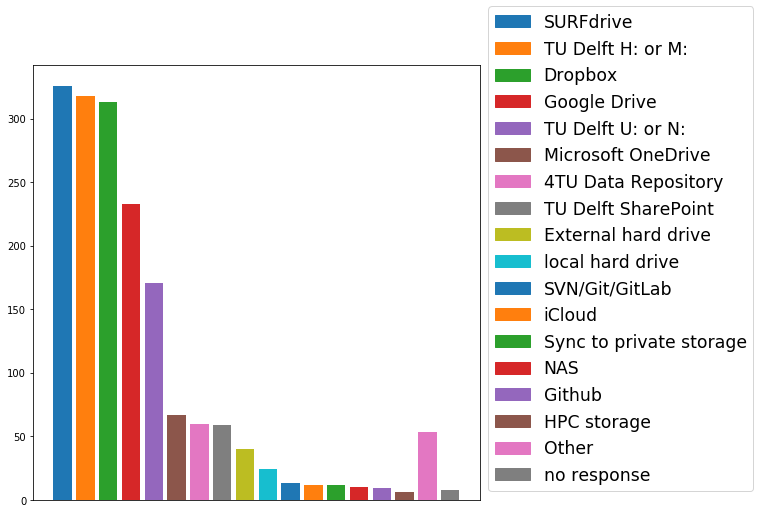

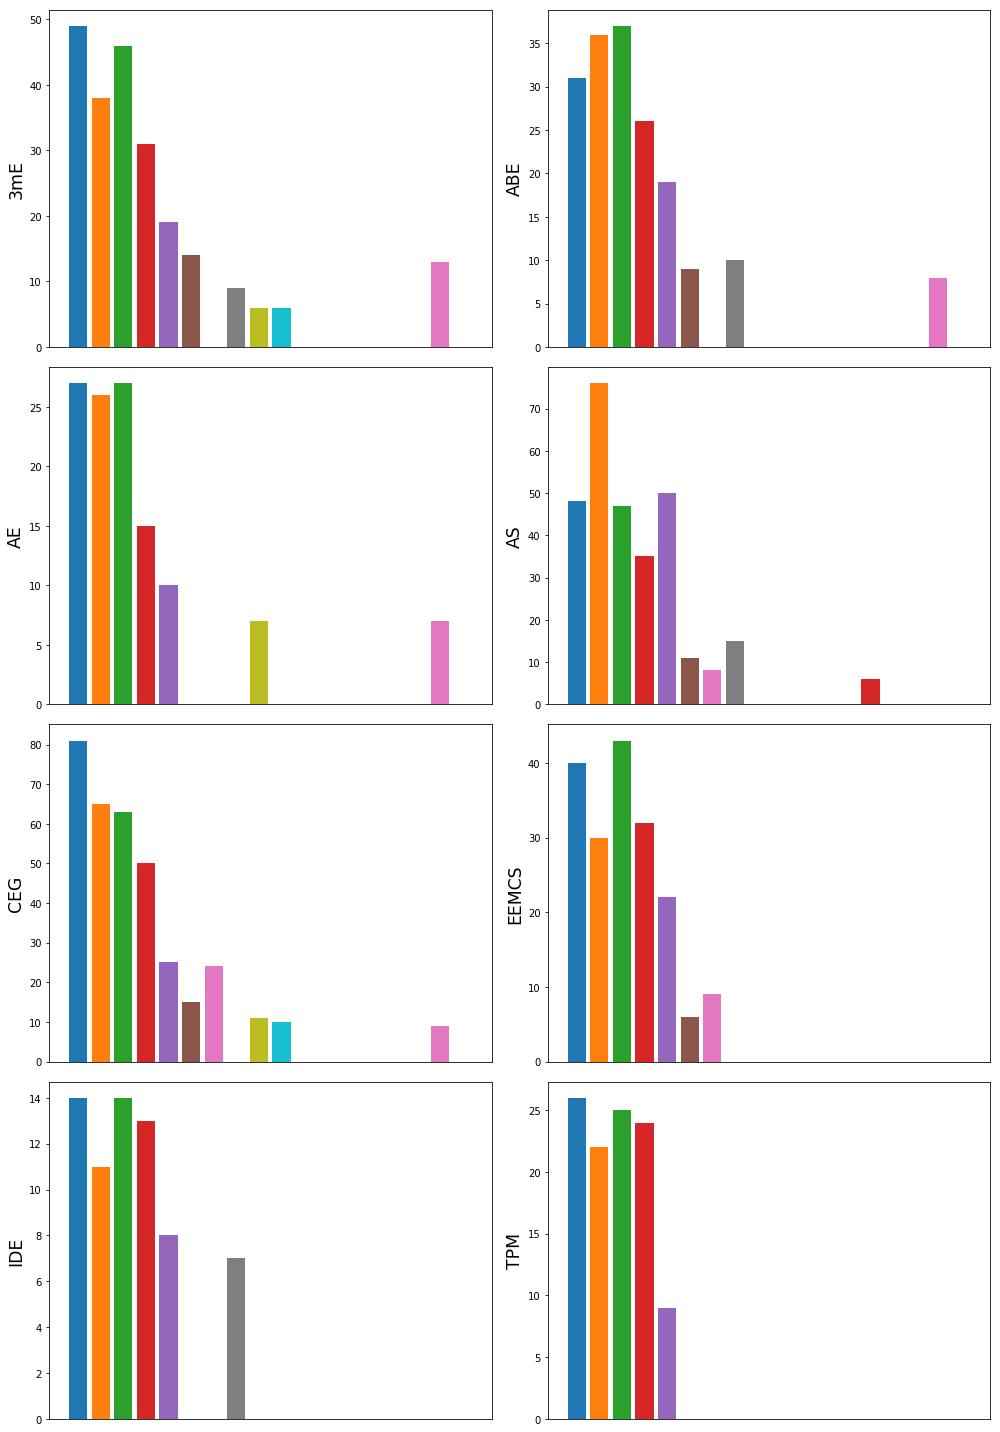

In [ ]:
# Select question 1
title = tab_dataframes["Question 1"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 1"].iloc[:, 1:-1].fillna(0.).astype(int)

output_question(question, title, 'bar')

### 2) Approximately how many of your files and folders do you need to share with Bachelor or Master students at the TU Delft?
Respondents could choose one of:
* None
* A small proportion
* About half
* A large proportion
* Nearly all

or not respond.

2) Approximately how many of your files and folders do you need to share with Bachelor or Master students at the TU Delft?
None                  146
A small proportion    394
About half             37
A large proportion     27
Nearly all             10
No response            11
dtype: int64


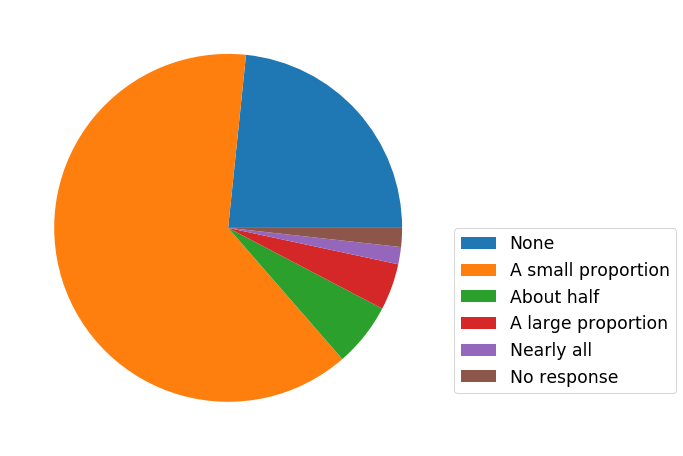

In [ ]:
# Select question 2
title = tab_dataframes["Question 2"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 2"].iloc[:, 1:].fillna(0.).astype(int)
output_question(question, title, 'pie')

### 3) Approximately how many of your files and folders do you need to share with people from outside the TU Delft?
Respondents could choose one of:
* None
* A small proportion
* About half
* A large proportion
* Nearly all

or not respond.

In [ ]:
# Select question 3
title = tab_dataframes["Question 3"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 3"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 3a) Where do these people work: at universities, in industry, in The Netherlands, Europe, over the whole world?
This was a free text field. The texts were analysed manually to extract the institutional categories:
* University/Research Institute
* Industry/NGO/Non-Profits

In [ ]:
# Select question 3a - part 1
title = tab_dataframes["Question 3a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 3a"].iloc[:, 1:4].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 3a) Where do these people work: at universities, in industry, in The Netherlands, Europe, over the whole world?
This was a free text field. The texts were analysed manually to extract the regional categories:
* The Netherlands
* Europe
* Whole World

Where respondents indicated more than one region, the widest was use. E.g. Leiden (NL) and China was categorised as 'Whole World'.

In [ ]:
# Select question 3a - part 2
title = tab_dataframes["Question 3a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 3a"].iloc[:, 4:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 4) How often do you need to access your data when you are not at the TU Delft campus?
Respondents could choose one of:
* Never
* Occasionally
* Often

or not respond.

In [ ]:
# Select question 4
title = tab_dataframes["Question 4"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 4"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 4a) Are there certain types of data that you need to access from outside the campus more often? For example manuscripts, scientific articles, spreadsheets, input files for computer simulations, raw experimental data, ...
This was a free text field, however, the question was leading.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question 4a
title = tab_dataframes["Question 4a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 4a"].iloc[:, 1:17].fillna(0.).astype(int)

output_question(question, title, 'bar')

### 5) How often do you need to access your data when you have little or no internet connection (e.g. at a remote location or on a plane)?
Respondents could choose one of:
* Never
* Occasionally
* Often

or not respond.

In [ ]:
# Select question 5
title = tab_dataframes["Question 5"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 5"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 5a) Are there certain types of data that you need to access offline more often?
This was a free text field.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question 5a
title = tab_dataframes["Question 5a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 5a"].iloc[:, 1:17].fillna(0.).astype(int)

output_question(question, title, 'bar')

### 6) How often do you need to access your data from a device other than your TU Delft laptop/PC?
Respondents could choose one of:
* Never
* Occasionally
* Often

or not respond.

In [ ]:
# Select question 6
title = tab_dataframes["Question 6"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 6"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 6a) Are there certain types of data that you need to access from other devices more often?
This was a free text field.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question 6a
title = tab_dataframes["Question 6a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 6a"].iloc[:, 1:17].fillna(0.).astype(int)

output_question(question, title, 'bar')

###### 6b) Which non-TU Delft devices do you use most often?
This was a free text field.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question 6b
title = tab_dataframes["Question 6b"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 6b"].iloc[:, 1:6].fillna(0.).astype(int)

output_question(question, title, 'bar')

### 7) Approximately how many of your files and folders contain privacy sensitive data - data that can be used to identify individuals?
Respondents could choose one of:
* None
* A small proportion
* About half
* A large proportion
* Nearly all

or not respond.

In [ ]:
# Select question 7
title = tab_dataframes["Question 7"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 7"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 8) Approximately how many of your files and folders dont contain privacy sensitive data, but are still sensitive - e.g. data concerning national security or data that could be useful to competitors of commercial project partners?
Respondents could choose one of:
* None
* A small proportion
* About half
* A large proportion
* Nearly all

or not respond.

In [ ]:
# Select question 8
title = tab_dataframes["Question 8"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 8"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 9) Would you like to track changes made to your data - who changed what and when?
Respondents could choose one of:
* Yes, I am legally obliged to track these changes
* Yes, I would like to track these changes
* No, I do not need to track these changes

or not respond.

In [ ]:
# Select question 9
title = tab_dataframes["Question 9"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 9"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'pie')

### 9a) Are there certain types of data that you need to access from other devices more often? If yes, please explain briefly
This was a free text field.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question 9a
title = tab_dataframes["Question 9a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 9a"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'bar')

### 10) What is your position at the TU Delft and in which faculty do you work?
Respondents could choose one of:
* Assistant/Associate/Full Professor
* PhD student/Postdoc

or not respond.

In [ ]:
# Select question 10
title = tab_dataframes["Question 10"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 10"].iloc[:, 1:].fillna(0.).astype(int)

title = "What is your position at the TU Delft?"
output_question(question, title, 'pie')

### 10a) In which faculty do you work?
Respondents could choose one of:
* 3mE
* ABE
* AE
* AS
* CEG
* EEMCS
* IDE
* TPM

or not respond.

In [ ]:
# Select question 10a
title = tab_dataframes["Question 10a"].columns[0].replace("\t", " ")
question = tab_dataframes["Question 10a"].iloc[:, 1:].fillna(0.).astype(int)

output_question(question, title, 'bar')

Phew, that's a nice confirmation that the faculty filter is working correctly.

### Bonus question) Please feel free to give us any further information you think is relevant
This was a free text field.

The texts were analysed manually to extract the categories shown.

In [ ]:
# Select question Bonus
title = tab_dataframes["Bonus"].columns[0].replace("\t", " ")
question = tab_dataframes["Bonus"].iloc[:, 1:].fillna(0.).astype(int)
output_question(question, title, 'bar')